# Representation learning

### Goals of Dimensionality Reduction 
- Build a map $g: \mathbb{R}^D \to \mathbb{R}^d$, where $ D \ll d$
- Nearby points remain nearby
- Distant points remain distant

### Input
- $ x_1, x_2, ..., x_n $ points in high dimensional space $ \mathbb{R}^D $

### Output
- $ y_1, y_2, ..., y_n $ points in low dimensional space $ \mathbb{R}^d$



# Data representation

### Linear structure
Does the data live in a low 
dimensional subspace?

![Linear](fig/LinearStructure.png)

### Nonlinear structure
Does the data live on a low 
dimensional submanifold?

![Nonlinear](fig/NonlinearStructure.png)

# Multidimensional Scaling (MDS)

- MDS attempts to preserve pairwise distances


- Attempts to construct a configuration of $n$ points in Euclidian space by using the information about the distances between the $n$ patterns.


- Two types of MDS:
  - Metric MDS
  
  - Non-metric MDS



# Metric MDS

- $ D \in R^{n \times n}$ - is called the distance matrix if it is symmetric, $d_{i i} = 0, d_{i j} > 0, i \ne j$


- Given the distance matrix $D^X$, MDS attempts to find $n$ data points $y_1, ..., y_n$ in $d$ dimensions, such that if $d_{i j}^Y$ denotes the Euclidean distance between $y_i$ and $y_j$, then $D^Y$ is similar to $D^X$.


- There exist, however, a number of non-Euclidean distance measures, which are limited to very specific research questions (cf. Borg & Groenen, 1997)

# Metric MDS. Optimization problem

Metric MDS minimizes:

$$ \min_Y \sum_{i=1, j=1}^n (d_{i j}^X - d_{i j}^Y)^2 $$

where 

$$ d_{i j}^X = ||x_i - x_j|| , d_{i j}^Y = ||y_i - y_j|| $$ 

# Metric MDS. Algorithm

Was first introduced by Torgerson (1952).

1. Set up the matrix of squared proximities $(D^X)^{(2)} = [(d^X)^2]$

2. The distance matrix $D^X$ can be converted to a Gram matrix $K$ by: 
$$ K = -\frac{1}{2} H (D^X)^{(2)} H $$ 
where $ H = I - \frac{1}{n} e e^T $

3. $K$ is p.s.d. thus $K = X^T X$.

3. Extract the $d$ largest positive eigenvalues $\Lambda^{1/2}_d$ of matrix $K$ and the corresponding $d$ eigenvectors $V^T_d$ (SVD for matrix K).

4. $Y = \Lambda^{1/2}_d V^T_d$

# Metric MDS. US cities example

![example](fig/MDSexample.png)

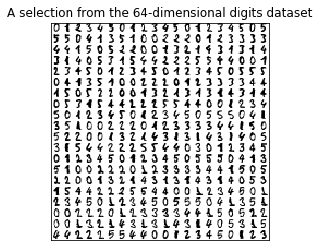

In [9]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

%matplotlib inline
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    
#----------------------------------------------------------------------
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing Metric MDS embedding
Done. Stress: 143467456.991591


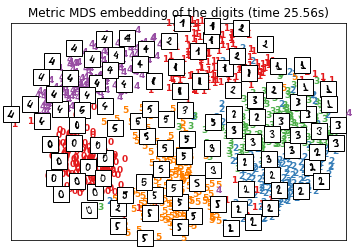

In [12]:
#----------------------------------------------------------------------
# Metric MDS embedding of the digits dataset
print("Computing Metric MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=2000)
t0 = time()
X_mmds = clf.fit_transform(X)
pos = clf.embedding_

print("Done. Stress: %f" % clf.stress_)
plt.figure(figsize=(10, 8))
plot_embedding(X_mmds,
               "Metric MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

# Metric MDS. Compare with PCA

![PCA](fig/PCAvsMDS.png)


# Metric MDS. Weaknesses


- The assumption that proximities behave like distances might be too restrictive, when it comes to employing MDS for exploring the perceptual space of human subjects.



# Goodness-of-Fit

- How well a particular set of data are represented by the model?

 
- Such a measure is called stress and is calculated as values:
$$ stress = \sqrt{\frac{\sum (d^X - d^Y)^2}{\sum( d^X )^2}} $$


- In his original paper on MDS, Kruskal (1964) gave following advise about stress values based on his experience:

![GOF](fig/GOF.png)

NOTE: More recent articles caution against using a table like this since acceptable values of stress depends on the quality of the distance matrix and the number of objects in that matrix. 

- There are many different stress formulae in the MDS literature

The data for MDS analyses are called proximities.  Proximities indicate the overall
similarity or dissimilarity of the objects under investigation. An MDS program looks
for a spatial configuration of the objects, so that the distances between the objects
match  their  proximities  as  closely  as  possible.   Often  the  data  are  arranged  in  a
square matrix – the proximity matrix.  There are two major groups of methods for
deriving proximities:  direct, and indirect methods.

# Nonmetric MDS


- In  order  to  overcome  this  problem,  Shepard  (1962)  and  Kruskal  (1964)  developed a method known as NMDS.


- The idea of a NMDS is to demand a less rigid relationship between the proximities and the distances. 


- In NMDS, only the ordinal information in the proximities is used for constructing the spatial configuration.


- Let $x$ denote the vector of proximities, $f(x)$ a monotonic transformation of $x$, and $d$ the point distances.


- Then coordinates have to be found, that minimize the so-called stress:
$$ stress = \sqrt{\frac{\sum (f(x) - d)^2}{\sum d^2}} $$

# Nonmetric MDS. Algorithm

1. Find a random configuration of points, e. g. by sampling from a normal distribution.

2. Calculate the distances $d$ between the points.

3. Find  the  optimal  monotonic  transformation  of  the  proximities,  in  order  to obtain optimally scaled data $f(x)$.

4. Minimize the stress between the optimally scaled data and the distances by finding a new configuration of points.

5. Compare the stress to some criterion.  If the stress is small enough then exit the algorithm else return to 2.

NOTE: The choice of  the starting configuration is important to finding the global rather than a local minimum. Many authors recommend using the solution of the metric MDS as the starting configuration. 

# Scree plot and Shepard diagram

There are two additional techniques commonly used for judging the adequacy of an MDS solution: the scree plot and the Shepard diagram (cf. Borg & Groenen, 1997; Hair, Anderson, Tatham & Black, 1998).

![SPSD](fig/SPSD.png)

In [4]:
# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause
%matplotlib inline

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])


27053.9417081
MDS: 2.1 sec
3335.72740875
NMDS: 0.66 sec


(-0.67954809517691117,
 0.71198270618791903,
 -0.70223090166608937,
 0.67785987769584932)

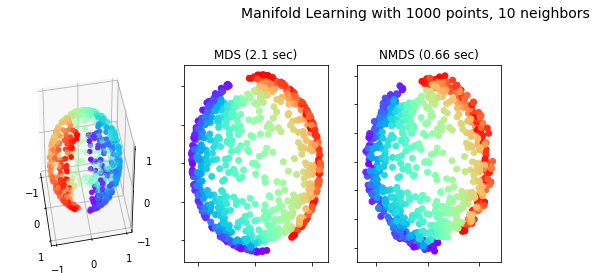

In [6]:
%matplotlib inline

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform MDS
t0 = time()
mds = manifold.MDS(2, max_iter=500, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
embd = mds.embedding_

print(mds.stress_)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(252)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# Perform NMDS
t0 = time()
mds = manifold.MDS(2, max_iter=1000, n_init=1, metric=False, eps=1e-12)
trans_data = mds.fit_transform(sphere_data, init=embd).T
print(mds.stress_)
t1 = time()
print("NMDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(253)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("NMDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

Number of pics = 70000
3.0
Stress:  2.77075090683e+12
Stress:  73030.4642182


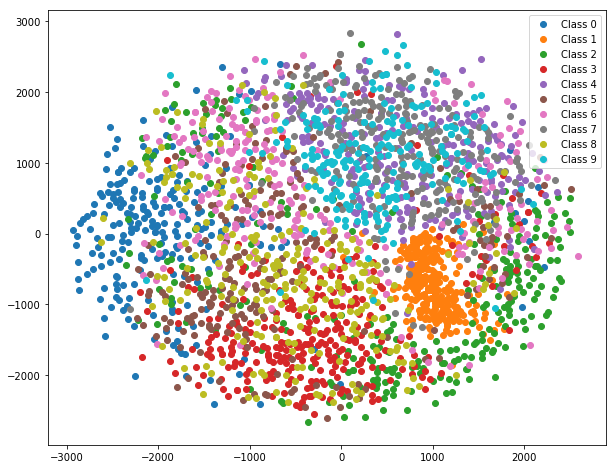

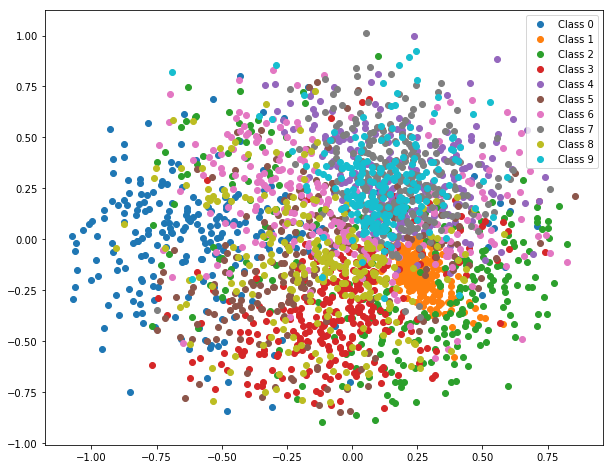

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn.manifold as sklman
import sklearn.decomposition as skldecomp

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./")

data = mnist["data"]
label = mnist["target"]
print("Number of pics = {}".format(data.shape[0]))
sel_idx = 20000
#plt.imshow(data[sel_idx].reshape(28, 28))
#plt.axis("off")
print(label[sel_idx])

idx_subset = np.random.randint(0, data.shape[0], (2500,))
X = data[idx_subset, :]
y = label[idx_subset]

mds = sklman.MDS(n_components=2, max_iter=1000, n_init=1)
X_mds = mds.fit_transform(X)
print('Stress: ', mds.stress_)
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_mds[y==cl, 0], X_mds[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")

nmds = sklman.MDS(n_components=2, max_iter=1000, n_init=1, metric=False)
X_nmds = nmds.fit_transform(X, init=X_mds)
print('Stress: ', nmds.stress_)
plt.figure(figsize=(10, 8))
for cl in np.unique(y):
    plt.scatter(X_nmds[y==cl, 0], X_nmds[y==cl, 1],
                label="Class {}".format(int(cl)))
plt.legend(loc="best")


# MDS. Weaknesses

### Consider nonlinear data structure (manifold):

![ISO2](fig/Isomap2.png)

### Rank ordering of Euclidean distances is NOT preserved in “manifold learning”.

# MDS. Implementations

- ELKI includes two MDS implementations.

- Orange, a free data mining software suite, module orngMDS

- PC-ORD, Multivariate Analysis of Ecological Data command NMS  
    
- MATLAB includes two MDS implementations (for classical (cmdscale) and non-classical (mdscale) MDS respectively).
    
- The R programming language offers several MDS implementations
    
- In Python sklearn contains function sklearn.manifold.MDS
    
- usabiliTEST's Online Card Sorting software is utilizing MDS to plot the data collected from the participants of usability tests.
    
- ViSta has implementations of MDS by Forrest W. Young. Interactive graphics allow exploring the results of MDS in detail.

- SPIDAL has implementations of parallel version of weighted deterministic annealing MDS proposed by Yang Ruan. The parallelized version allows processing millions of data points using MDS possible.


# MDS. Summary

### Pro
- Input: only distance matrix (for MMDS) or proximity matrix (for NMDS)


- Specific norm can be chosen


- Simple


### Contra
- MDS for nonlinear data structure (manifold) - not good approach. Isomap or LLE is better